In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join('C:\\Users\\r.hakimov\\Documents\\GitHub\\ReinforcementLearning'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:

from Models.A2C import A2C
import gym

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from Utils import encode_actions
NUM_EPOCHS = 1000


In [6]:
def run_training(env,model,action_array):
    actor_losses = []
    critic_losses = []
    total_rewards = []
    for i_episode in range(NUM_EPOCHS):
        if i_episode%100==1:
            print(str(i_episode)+' Total Reward = '+ str(total_rewards[-1]))
        states,actions,rewards,next_states,dones = [],[],[],[],[]       
        observation = env.reset()
        done = False
        k = 0
        total_reward = 0
        while done==False:
    
            k=k+1
            action = model.predict_action(np.array([observation]))
            states.append(observation)
            observation, reward, done, info = env.step(action_array[action])
            if (k>200):
                done = True
           
            next_states.append(observation)
            actions.append(action)
            rewards.append(reward)
            dones.append(done)
            total_reward+=reward        
        actor_loss, critic_loss = model.train(states,actions,rewards,next_states,dones)
        total_rewards.append(total_reward)
        actor_losses.append(actor_loss)
        critic_losses.append(critic_loss)
    return total_rewards

In [20]:
env = gym.make('CartPole-v0')
model = A2C(env.observation_space.shape[0],2,[8,16],lr_actor=0.001,lr_critic=0.001,gamma=0.99)
a2c_total_rewards = run_training(env,model,[0,1])

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


1 Total Reward = 30.0


101 Total Reward = 22.0


201 Total Reward = 19.0


301 Total Reward = 33.0


401 Total Reward = 47.0


501 Total Reward = 11.0


KeyboardInterrupt: 

In [10]:
def plot_running_reward(total_rewards,gamma = 0.9):    
    running_rewards = []
    running_reward = 0
    for i in range(len(total_rewards)):
        running_reward = gamma*running_reward+(1-gamma)*total_rewards[i]
        running_rewards.append(running_reward)
    plt.plot(range(0,NUM_EPOCHS),running_rewards)


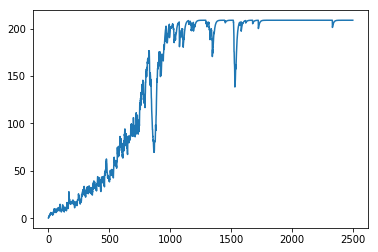

In [10]:
plot_running_reward(a2c_total_rewards,0.9)

In [6]:
env = gym.make('BipedalWalker-v2')
encoded_actions = encode_actions(env.action_space.low,env.action_space.high,[0.5,0.5,0.5,0.5])
model = A2C(env.observation_space.shape[0],len(encoded_actions),[64,128,256,512],lr_actor=0.001,lr_critic=0.001,gamma=0.99)
a2c_total_rewards = run_training(env,model,encoded_actions)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


1 Total Reward = -14.749355176939304


101 Total Reward = -19.32724110502681


201 Total Reward = -19.176010249259505


301 Total Reward = -20.608857382941927


401 Total Reward = -25.61191058174328


501 Total Reward = -19.558876531741205


601 Total Reward = -19.389538775740746


701 Total Reward = -19.534786087460134


801 Total Reward = -25.692203823398735


901 Total Reward = -19.133709201510932


1001 Total Reward = -19.25732700580973


1101 Total Reward = -25.264380742407027


1201 Total Reward = -25.607423861355148


1301 Total Reward = -19.187262352400086


1401 Total Reward = -19.5161548027141


1501 Total Reward = -19.127246570229467


1601 Total Reward = -19.177926426209446


1701 Total Reward = -19.60917108148889


1801 Total Reward = -25.625108729115937


1901 Total Reward = -25.604926689837683


2001 Total Reward = -19.453868136662926


2101 Total Reward = -19.405554759470682


2201 Total Reward = -25.52105301044192


2301 Total Reward = -19.378315442396264


2401 Total Reward = -25.5291346407799


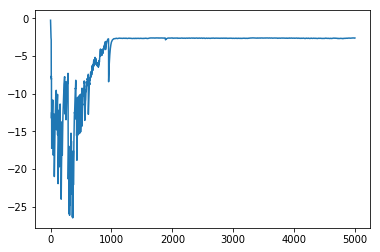

In [40]:
plot_running_reward(a2c_total_rewards,0.95)

In [12]:
env = gym.make('BipedalWalker-v2')
encoded_actions = encode_actions(env.action_space.low,env.action_space.high,[1,1,1,1])
model = A2C(env.observation_space.shape[0],len(encoded_actions),[42],lr_actor=0.001,lr_critic=0.001,gamma=0.99)
a2c_total_rewards = run_training(env,model,encoded_actions)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


1 Total Reward = -15.684823465809808


101 Total Reward = -104.59027845917704


201 Total Reward = -101.39968483542155


301 Total Reward = -103.34091292488264


401 Total Reward = -11.022670346924388


501 Total Reward = -12.175252558844132


601 Total Reward = -9.235870079074655


701 Total Reward = -11.70807538163722


801 Total Reward = -108.40566276338635


901 Total Reward = -14.75692101515205


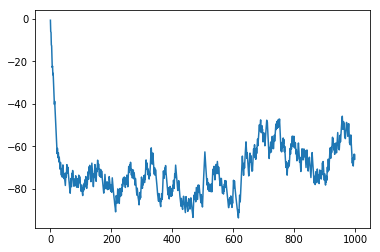

In [13]:
plot_running_reward(a2c_total_rewards,0.95)